### Introduction to Machine Learning with Python
## Chapter 7. 텍스트 데이터 다루기
---
## IMDb 리뷰 - 여러 단어로 만든 BOW (n-gram)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
imdb_train, imdb_test = np.load('imdb.npy')

text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
y_train = imdb_train.target

### 여러 단어로 만든 BOW (n-gram)
- 연속된 여러 단어를 하나로 취급
- 단어(token) 하나 uni-gram, 단어 두개 bi-gram, 단어 세개 tri-gram, 단어 n개 n-gram
- ngram_range=[token_min, token_max] 옵션을 사용하는데, 메모리 에러가 발생할 수 있다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2))
X_train = vect.fit_transform(text_train)

In [4]:
type(vect.vocabulary_), len(vect.vocabulary_)

(dict, 1522634)

In [5]:
fn = np.array(vect.get_feature_names())
fn[::100000]

array(['00', 'appreciating the', 'brazil minha', 'contessa',
       'early actresses', 'for cheap', 'heist thing', 'it disheartening',
       'mainly related', 'nobody writes', 'pheobe buffay', 'rifle much',
       'solved and', 'the doorstep', 'unintelligible half',
       'work optimally'], dtype='<U89')

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(C=10), X_train, y_train)
scores

array([0.88672906, 0.89416847, 0.89354297])

- 계수 조사를 위해 모델을 만든다

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10) # 교재 414 쪽 참조
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

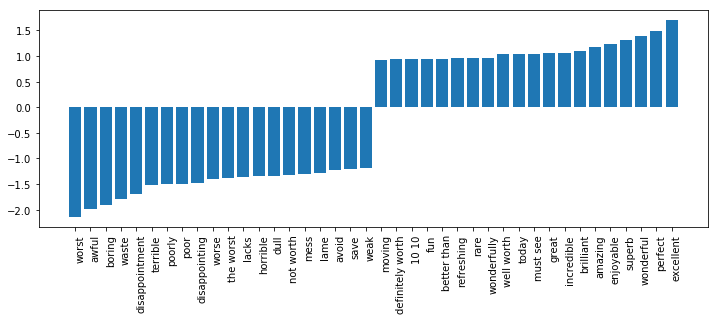

In [10]:
w = model.coef_[0]
indexer = w.argsort()

plt.figure(figsize=[12,4])
plt.bar(range(40),w[np.r_[indexer[:20],indexer[-20:]]])
plt.xticks(range(40), fn[np.r_[indexer[:20],indexer[-20:]]], rotation=90, ha='left')
print('')

In [11]:
mask = np.array([len(s.split(' ')) for s in fn])==2

In [12]:
w2 = w[mask]
indexer = w2.argsort()

In [13]:
fn2 = fn[mask]

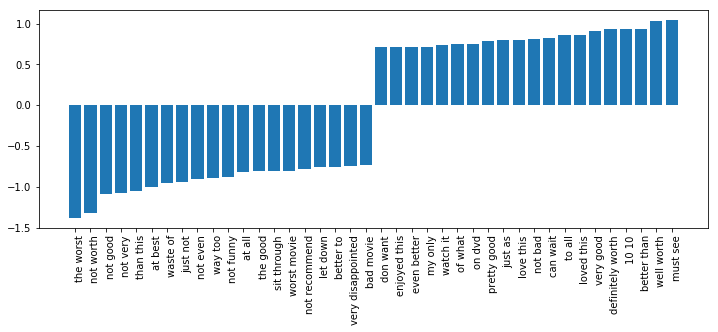

In [15]:
plt.figure(figsize=[12,4])
plt.bar(range(40),w2[np.r_[indexer[:20],indexer[-20:]]])
plt.xticks(range(40), fn2[np.r_[indexer[:20],indexer[-20:]]], rotation=90, ha='left')
# plt.xticks(range(40), imp_fn2, rotation=90, ha='left')
print('')